## Script to generate Figure3B in Lakshmikanth, Consiglio et al - Immune system adaptation during Gender affirming Testosterone treatment
#### Author Rikard Forlin - rikard.forlin@ki.se

# Figure 3B - Monocytes - genes

In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Specify adata_paths here

In [3]:
r848_v1_path = '../../data/anndata_folder_scRNAseq/R848V1.h5ad' #
r848_v2_path = '../../data/anndata_folder_scRNAseq/R848V2.h5ad'#

ntc_v1_path = '../../data/anndata_folder_scRNAseq/NTCV1.h5ad'#
ntc_v2_path = '../../data/anndata_folder_scRNAseq/NTCV2.h5ad'#

lps_v1_path = '../../data/anndata_folder_scRNAseq/LPSV1.h5ad'#
lps_v2_path = '../../data/anndata_folder_scRNAseq/LPSV2.h5ad'#

In [4]:
lps_v1 = sc.read_h5ad(lps_v1_path)
lps_v2 = sc.read_h5ad(lps_v2_path)

ntc_v1 = sc.read_h5ad(ntc_v1_path)
ntc_v2 = sc.read_h5ad(ntc_v2_path)



In [5]:
ct = 'Monocyte'
countv1 = lps_v1[lps_v1.obs.celltype == ct].to_df() 
countv2 = lps_v2[lps_v2.obs.celltype == ct].to_df() 


notstim_v1 = ntc_v1[ntc_v1.obs.celltype == ct].to_df()
notstim_v2 = ntc_v2[ntc_v2.obs.celltype == ct].to_df()


In [6]:
#Only take columns that are found in both countmatrices
countv1 = countv1[countv1.columns[countv1.columns.isin(countv2.columns)]]
countv2 = countv2[countv2.columns[countv2.columns.isin(countv1.columns)]]

In [7]:
#Calculate the median
ntcmedian_v1 = notstim_v1.median()
ntcmedian_v2 = notstim_v2.median()

#Take columns found in countmatrices
ntcmedian_v1 = ntcmedian_v1[ntcmedian_v1.index.isin(countv1.columns)]
ntcmedian_v2 = ntcmedian_v2[ntcmedian_v2.index.isin(countv2.columns)]


In [8]:
countv2_sub = countv2.copy(deep = True)
countv1_sub = countv1.copy(deep = True)

In [9]:
countv1_sub = countv1_sub[ntcmedian_v1.index]
countv2_sub = countv2_sub[ntcmedian_v2.index]

In [10]:
#Normalizing by subtracting median sum
countv1_sub = countv1_sub - ntcmedian_v1
countv2_sub = countv2_sub - ntcmedian_v2

In [11]:
markers = ['TNF', 'CXCL2', 'SERPINB2', 'CD44', 'CCL20', 'SOCS3', 'IL6','IL1B', 'IL1A','F3']

In [12]:
countv2_sub = countv2_sub.fillna(0)
countv1_sub = countv1_sub.fillna(0)

In [13]:
markersum_v1 = np.sum(countv1_sub[countv1_sub.columns[countv1_sub.columns.isin(markers)]])

In [14]:
markersum_v2 = np.sum(countv2_sub[countv2_sub.columns[countv2_sub.columns.isin(markers)]])

In [15]:
markers

['TNF',
 'CXCL2',
 'SERPINB2',
 'CD44',
 'CCL20',
 'SOCS3',
 'IL6',
 'IL1B',
 'IL1A',
 'F3']

In [16]:
violin_df = pd.DataFrame()
for m in markers:
    temp1 = pd.DataFrame({'value': countv1_sub[m], 'gene':m, 'V':'V1'})
    temp2 = pd.DataFrame({'value': countv2_sub[m], 'gene':m, 'V':'V2'})
    both = pd.concat([temp1, temp2])
    violin_df = pd.concat([both, violin_df])

<AxesSubplot: xlabel='gene', ylabel='value'>

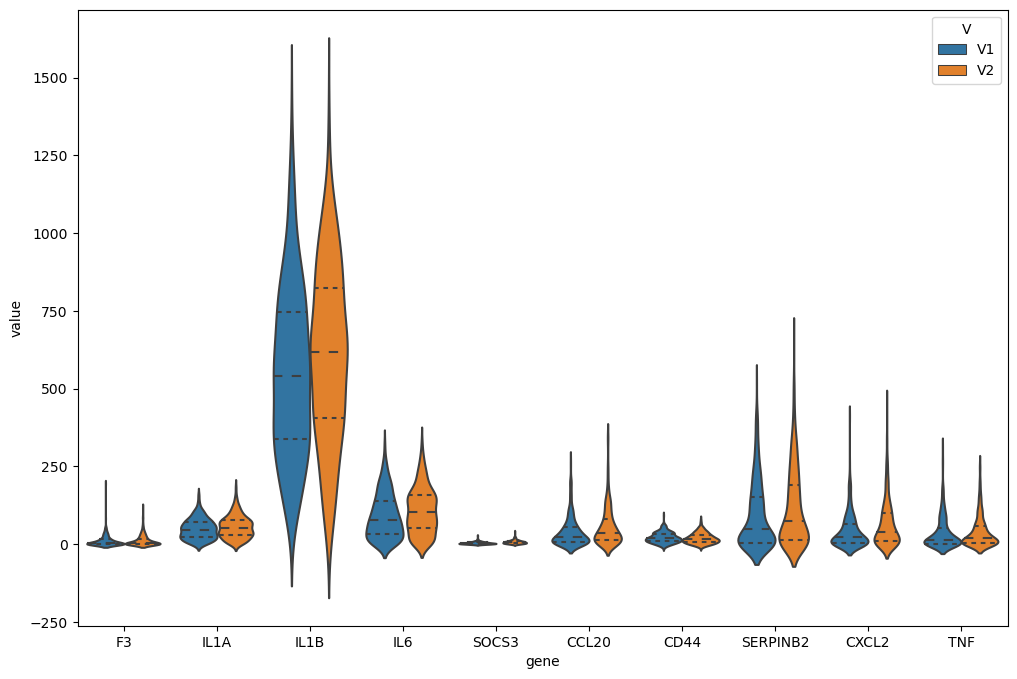

In [17]:

plt.figure(figsize = (12,8))
#sns.swarmplot(x = 'gene', y = 'value', hue = 'V', data = violin_df, dodge = True, edgecolor = 'white', linewidth = 0.25, alpha = 0.25, palette = ['black', 'black'], legend = False)
sns.violinplot(x = 'gene', y = 'value', hue = 'V', data = violin_df, inner = 'quartile')



### To make a figure that's more alike the one in the paper - use the R-script below to produce the figure

In [18]:
violin_df.to_csv('violin_df_MonosLPS_Hallmark TNF.csv')

In [19]:
!Rscript Figure3B.R

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead. 
2: In log(V1) : NaNs produced
3: In log(V1) : NaNs produced
4: In log(V2) : NaNs produced
5: Removed 5397 rows containing non-finite values (`stat_density()`). 
6: Removed 4260 rows containing non-finite values (`stat_density()`). 
